<a href="https://colab.research.google.com/github/me-oniichan/Digit-Classification/blob/main/digit_classifier_with_bg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/sample_data/mnist_train_small.csv").to_numpy().astype(np.float32)

In [ ]:
data.shape

(19999, 785)

In [3]:
tsize = 15000
vsize = data.shape[0] - 15000

In [4]:
ds_train = data[:tsize, 1:785]/255.
# train_label = data[:tsize, 0]
ds_valid = data[tsize:, 1:]/255.
# valid_label = data[tsize:, 0] 

In [5]:
train_label = np.zeros([tsize, 10])
train_label[np.arange(tsize), data [0:tsize, 0].astype("int32")] = 1
valid_label = np.zeros([vsize, 10])
valid_label[np.arange(vsize), data [0:vsize, 0].astype("int32")] = 1

In [6]:
valid_label = np.zeros([vsize, 10])
valid_label[np.arange(vsize), data [tsize:, 0].astype("int32")] = 1

In [7]:
def noise(size):
  return np.random.rand(size, 28*28)

In [8]:
logic_array = ds_train == 0

In [ ]:
logic_array

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [9]:
ds_train = ds_train + logic_array*noise(tsize)

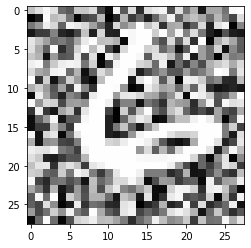

In [10]:
plt.imshow(np.resize(ds_train[100], (28,28)), cmap='Greys_r')

In [11]:
logic_valid = ds_valid ==0

In [ ]:
noise(vsize).shape

(4999, 784)

In [12]:
ds_valid = ds_valid + logic_valid*noise(vsize)

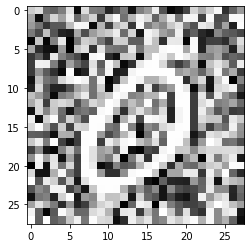

In [13]:
plt.imshow(np.resize(ds_valid[100], (28,28)), cmap='Greys_r')

In [29]:
#reshape data for cnn
ds_train = np.reshape(ds_train, (tsize, 28,28))

In [41]:
ds_valid = np.reshape(ds_valid, (vsize, 28,28))

In [45]:
model = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding= 'same',input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((2,2), padding='same'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding= 'same'),
    tf.keras.layers.MaxPool2D((2,2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

In [46]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 3136)              0         
                                                                 
 dense_12 (Dense)            (None, 128)              

In [47]:
model.compile(optimizer = "adam", loss=tf.keras.losses.CategoricalCrossentropy(), metrics = ['accuracy'])

In [21]:
np.argmax(train_label, axis = 1)

array([5, 7, 9, ..., 7, 3, 5])

In [48]:
model.fit(x = ds_train, y = train_label, epochs = 15, batch_size = 200)

Epoch 1/15
75/75 [==============================] - 10s 132ms/step - loss: 1.9165 - accuracy: 0.3946
Epoch 2/15
75/75 [==============================] - 11s 143ms/step - loss: 0.5836 - accuracy: 0.8259
Epoch 3/15
75/75 [==============================] - 12s 157ms/step - loss: 0.3498 - accuracy: 0.8945
Epoch 4/15
75/75 [==============================] - 10s 134ms/step - loss: 0.2746 - accuracy: 0.9165
Epoch 5/15
75/75 [==============================] - 10s 134ms/step - loss: 0.2284 - accuracy: 0.9295
Epoch 6/15
75/75 [==============================] - 10s 133ms/step - loss: 0.1935 - accuracy: 0.9407
Epoch 7/15
75/75 [==============================] - 10s 134ms/step - loss: 0.1636 - accuracy: 0.9517
Epoch 8/15
75/75 [==============================] - 10s 134ms/step - loss: 0.1417 - accuracy: 0.9575
Epoch 9/15
75/75 [==============================] - 10s 133ms/step - loss: 0.1249 - accuracy: 0.9627
Epoch 10/15
75/75 [==============================] - 11s 145ms/step - loss: 0.1116 - accura

In [49]:
model.evaluate(ds_valid, valid_label)

157/157 [==============================] - 1s 7ms/step - loss: 0.1616 - accuracy: 0.9490


[0.1616089642047882, 0.9489898085594177]

In [50]:
predictions= model.predict(ds_valid)

In [51]:
predictions[9].argmax() ,valid_label[9].argmax()

(8, 8)

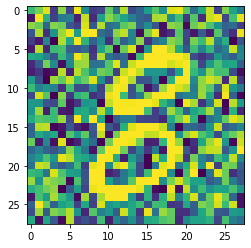

In [52]:
plt.imshow(np.reshape(ds_valid[9], (28,28)))

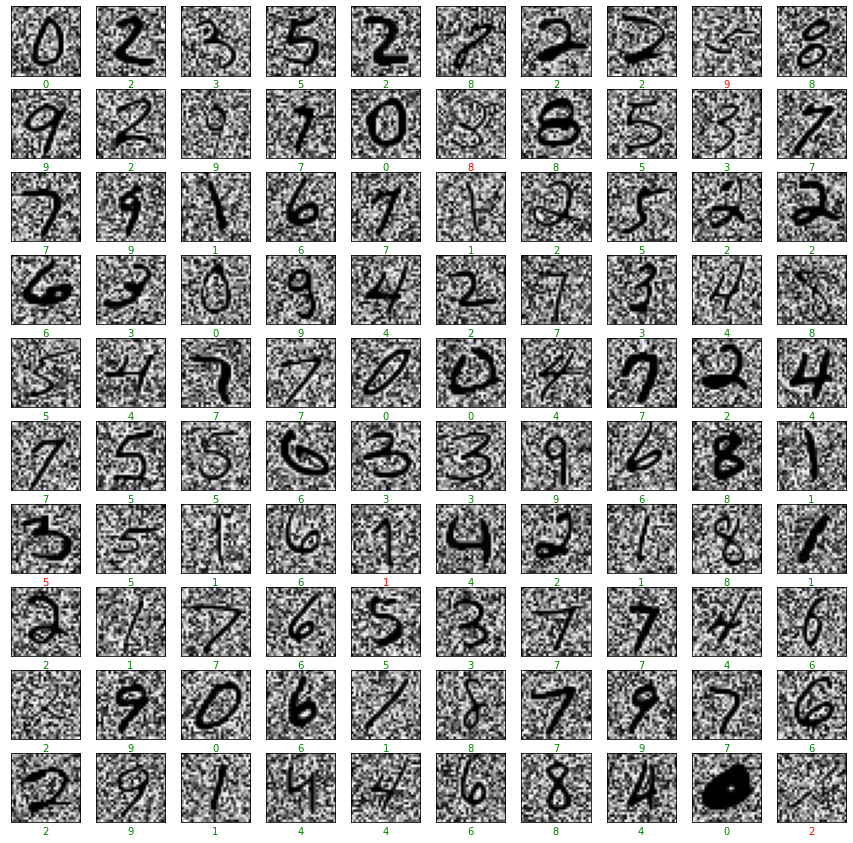

In [53]:
plt.figure(figsize=(15,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.reshape(ds_valid[i], (28,28)), cmap=plt.cm.binary)
    if predictions[i].argmax() == valid_label[i].argmax(): color= "green"
    else: color = "red"
    plt.xlabel(f"{predictions[i].argmax()}", color = color)
plt.show()

## Test on external data

In [54]:
import cv2

In [110]:
img = cv2.imread("images.jpg", 0)
img = cv2.resize(img, (28,28))
print(img)

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 245 255 248 25

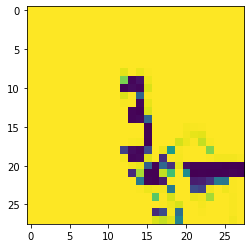

In [111]:
plt.imshow(img)

In [112]:
p = model.predict(np.array([img]))
p.argmax()

2